# Banking Analytics Project

### Introduction
This case study aims to give you an idea of applying data analytics in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specializes in lending various types of loans to urban customers. You have to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
•	If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
•	If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
•	The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
•	All other cases: All other cases when the payment is paid on time.
When a client applies for a loan, there are four types of decisions that could be taken by the client/company):
•	Approved: The Company has approved loan Application
•	Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
•	Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
•	Unused offer:  Loan has been cancelled by the client but on different stages of the process.
Use all that you have learnt in the banking analytics module to create an insight for the business.


#### Importing all the required libraries

In [138]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the files
appl_data = pd.read_csv('application_data.csv')
appl_data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
appl_data.shape

(307511, 122)

In [4]:
appl_data.set_index('SK_ID_CURR',inplace=True)

### DATA PRE-PROCESSING

In [5]:
#missing value treatment
appl_data.isnull().sum()/len(appl_data)*100

TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 121, dtype: float64

###### Always we need to treat null values otherwise it hardly effect our analysis. Many of the columns have around or more than 40% null values.Therefore we will remove these columns with percentage null above 40% as threshold.
Tried with different percentage of null value

In [6]:
#select the columns which have less than 40% null values
appl_data = appl_data.loc[:,(100 * appl_data.isnull().mean())<45]

In [7]:
appl_data.shape

(307511, 72)

In [8]:
appl_data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
  

###### 25 columns are removed because it contains more than 50% null values

### REMOVING UNWANTED COLUMNS

In [9]:
#adding the names of columns from 'EXT_Source_3' upto 'FLAG_DOCUMENT_21' to a list 'col'
#col = list(app_data.loc[:,'OBS_30_CNT_SOCIAL_CIRCLE':'FLAG_DOCUMENT_21'].columns)
#adding remaining unwanted columns to the list 'col'
col = ['OBS_30_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_21','CODE_GENDER','NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL',
       'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_CONT_MOBILE','FLAG_EMAIL','CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
#dropping all the column names present in col from app_data
appl_data.drop(columns = col,inplace=True)

In [10]:
appl_data.head(2)

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### ENCODING

In [11]:
appl_data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDI

In [12]:
appl_data.isnull().sum()/len(appl_data)*100

TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
OCCUPATION_TYPE               31.345545
ORGANIZATION_TYPE              0.000000
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [13]:
#Imputation of these columns with mean
appl_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(round(appl_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()),inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(round(appl_data['AMT_REQ_CREDIT_BUREAU_DAY'].mean()),inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(round(appl_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()),inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(round(appl_data['AMT_REQ_CREDIT_BUREAU_MON'].mean()),inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(round(appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].mean()),inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(round(appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()),inplace=True)

In [14]:
#we clearly see its filled correctly
appl_data.isnull().sum()/len(appl_data)*100

TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
OCCUPATION_TYPE               31.345545
ORGANIZATION_TYPE              0.000000
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [15]:
appl_data.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
100007,0,Cash loans,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
appl_data['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

### Label Encoding

In [17]:
#Putting 1 for 'Y' and 0 for 'N' in the columns 'FLAG_OWN_CAR' & 'FLAG_OWN_REALTY'
appl_data['FLAG_OWN_CAR'] = appl_data['FLAG_OWN_CAR'].replace({'Y':1,'N':0})

In [18]:
appl_data['FLAG_OWN_REALTY'] = appl_data['FLAG_OWN_REALTY'].replace({'Y':1,'N':0})

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(appl_data['NAME_CONTRACT_TYPE'])
appl_data['NAME_CONTRACT_TYPE']=le.fit_transform(appl_data['NAME_CONTRACT_TYPE'])

In [20]:
appl_data['NAME_INCOME_TYPE']=le.fit_transform(appl_data['NAME_INCOME_TYPE'])
appl_data['NAME_EDUCATION_TYPE']=le.fit_transform(appl_data['NAME_EDUCATION_TYPE'])
appl_data['NAME_FAMILY_STATUS']=le.fit_transform(appl_data['NAME_FAMILY_STATUS'])
appl_data['NAME_HOUSING_TYPE']=le.fit_transform(appl_data['NAME_HOUSING_TYPE'])

In [21]:
appl_data.describe()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,4.670288,...,0.000267,0.008130,0.000595,0.000507,0.005538,0.006055,0.029723,0.231293,0.229631,1.913480
std,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,2.544525,...,0.016327,0.089798,0.024387,0.022518,0.078014,0.103037,0.190728,0.856810,0.744059,1.738864
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,7.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### Inference from descriptive statistics

AMT_INCOME_TOTAL:The people who are presently a customer with bank has an average income of 1.471500e+05 ,25% of people are having up to 1.125000e+05 & 75% has more than that.75% of people are having 2.025000e+05 as salary in anual basis  & 25% has more than that.There is a large variation in standard deviation because people earns highly different salary ranges
Max Annual salary = 1.170000e+08
Min Annual salary = 2.565000e+04

From descriptive analysis more than the salary bank is offering the people credit.That also vary in wider range

###### Deriving a new column 'Age_Group' from 'DAYS_BIRTH' by binning the age in brackets of 10 years. Similarly, deriving new column 'Employee_Since(years)' from 'DAYS_EMPLOYED'

In [22]:
#Creating AGE_GROUP by dividing DAYS_BIRTH with 365 and then again dividing it by 10
appl_data['Age_Group'] = (appl_data['DAYS_BIRTH']/(-3650)).astype(int) #365*10=3650
#Creating Employee_Since(years) by diving DAYS_EMPLOYED with 365
appl_data['Employee_Since(years)'] = round(appl_data['DAYS_EMPLOYED']/(-365))
#Removing the 'DAYS_BIRTH' and 'DAYS_EMPLOYED' columns from app_data
appl_data.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED'], inplace=True)

###### We can create another column INCOME_LEVEL which will take values LOW, MEDIUM, HIGH based on the values of AMT_INCOME_TOTAL. We can use this to identify which income level clients has higher default rate on the loan.

In [23]:
#We are categorizing total income of clients into LOW, MID and HIGH where LOW < 100000 < MID < 250000 < HIGH
appl_data['INCOME_LEVEL'] = pd.cut(appl_data['AMT_INCOME_TOTAL'], bins=[appl_data['AMT_INCOME_TOTAL'].min(),100000,
                                                                      250000,appl_data['AMT_INCOME_TOTAL'].max()],
                            labels=['LOW','MID','HIGH'])

In [24]:
appl_data['INCOME_LEVEL'].value_counts()

MID     204035
LOW      63696
HIGH     39778
Name: INCOME_LEVEL, dtype: int64

##### Divide the entire dataset to two groups: Defaulters or Non defaulters

In [25]:
non_defaulters= appl_data.loc[appl_data['TARGET'] == 0]
defaulters = appl_data.loc[appl_data['TARGET'] == 1]

In [26]:
defaulters.head(2)

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Group,Employee_Since(years),INCOME_LEVEL
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,7,...,0,0.0,0.0,0.0,0.0,0.0,1.0,2,2.0,MID
100031,1,0,0,1,0,112500.0,979992.0,27076.5,702000.0,7,...,0,0.0,0.0,0.0,0.0,2.0,2.0,5,7.0,MID


In [27]:
non_defaulters.head(2)

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Group,Employee_Since(years),INCOME_LEVEL
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,4,3.0,HIGH
100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,7,...,0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.0,LOW


There is no need to check outliers for some features.eg:As the children count increases for a person automatically there is chances to default.

In [28]:
non_defaulters.describe()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Group,Employee_Since(years)
count,282686.0,282686.00000,282686.000000,282686.000000,282686.000000,2.826860e+05,2.826860e+05,282674.000000,2.824290e+05,282686.000000,...,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000
mean,0.0,0.09790,0.343176,0.694513,0.412946,1.690777e+05,6.026483e+05,27163.623349,5.427368e+05,4.634977,...,0.000605,0.000506,0.005540,0.006003,0.029796,0.235049,0.230917,1.903791,3.920346,-180.050660
std,0.0,0.29718,0.474770,0.460614,0.718843,1.104763e+05,4.068459e+05,14658.307178,3.737855e+05,2.542186,...,0.024588,0.022486,0.078079,0.103545,0.191143,0.870311,0.755824,1.736756,1.235165,391.576321
min,0.0,0.00000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-1001.000000
25%,0.0,0.00000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000
50%,0.0,0.00000,0.000000,1.000000,0.000000,1.485000e+05,5.177880e+05,24876.000000,4.500000e+05,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000
75%,0.0,0.00000,1.000000,1.000000,1.000000,2.025000e+05,8.100000e+05,34749.000000,6.885000e+05,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.000000,8.000000
max,0.0,1.00000,1.000000,1.000000,19.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,7.000000,...,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,6.000000,49.000000


In [29]:
defaulters.describe()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Group,Employee_Since(years)
count,24825.0,24825.000000,24825.000000,24825.000000,24825.000000,2.482500e+04,2.482500e+04,24825.000000,2.480400e+04,24825.000000,...,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000
mean,1.0,0.064612,0.305176,0.684109,0.463807,1.656118e+05,5.577785e+05,26481.744290,4.889724e+05,5.072387,...,0.000483,0.000524,0.005519,0.006647,0.028882,0.188520,0.214985,2.023807,3.576314,-116.190896
std,0.0,0.245845,0.460491,0.464879,0.756903,7.466770e+05,3.464332e+05,12450.676999,3.116365e+05,2.536623,...,0.021981,0.022878,0.077277,0.097069,0.185944,0.683106,0.593689,1.758971,1.191293,327.463734
min,1.0,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-1001.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.844000e+05,17361.000000,2.385000e+05,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000
50%,1.0,0.000000,0.000000,1.000000,0.000000,1.350000e+05,4.975200e+05,25263.000000,4.500000e+05,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000
75%,1.0,0.000000,1.000000,1.000000,1.000000,2.025000e+05,7.333155e+05,32976.000000,6.750000e+05,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,6.000000
max,1.0,1.000000,1.000000,1.000000,11.000000,1.170000e+08,4.027680e+06,149211.000000,3.600000e+06,7.000000,...,1.000000,1.000000,2.000000,4.000000,6.000000,17.000000,19.000000,22.000000,6.000000,44.000000


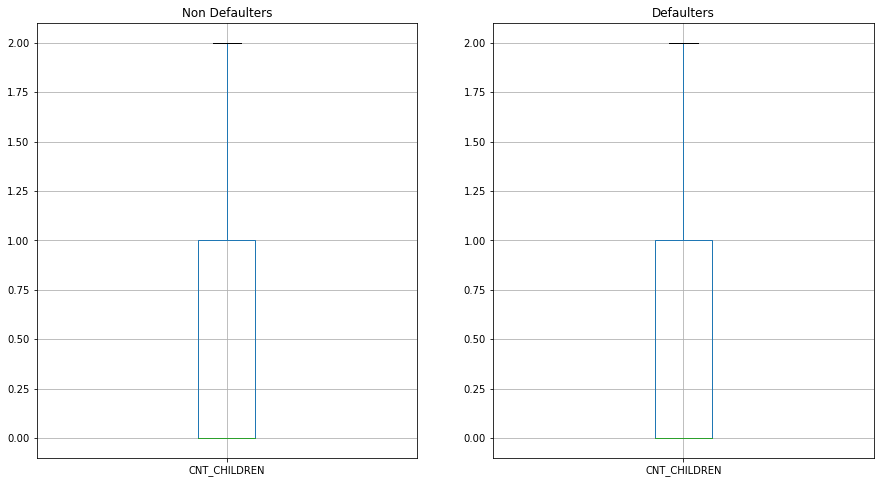

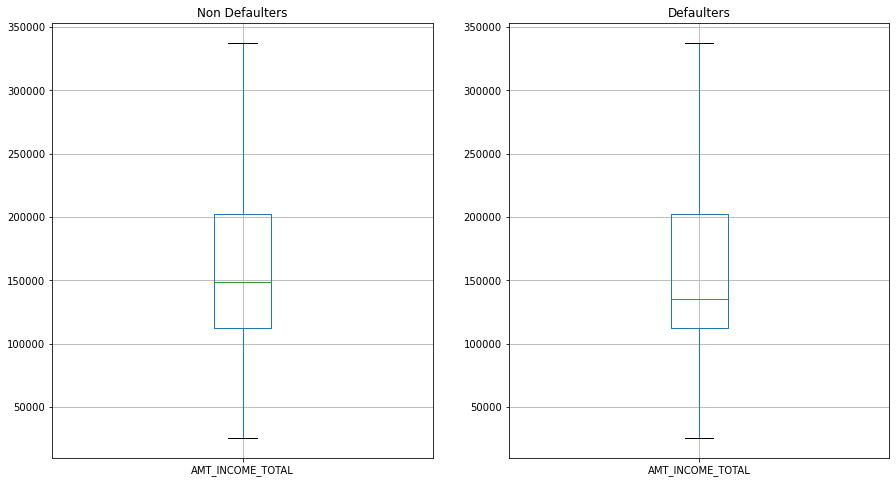

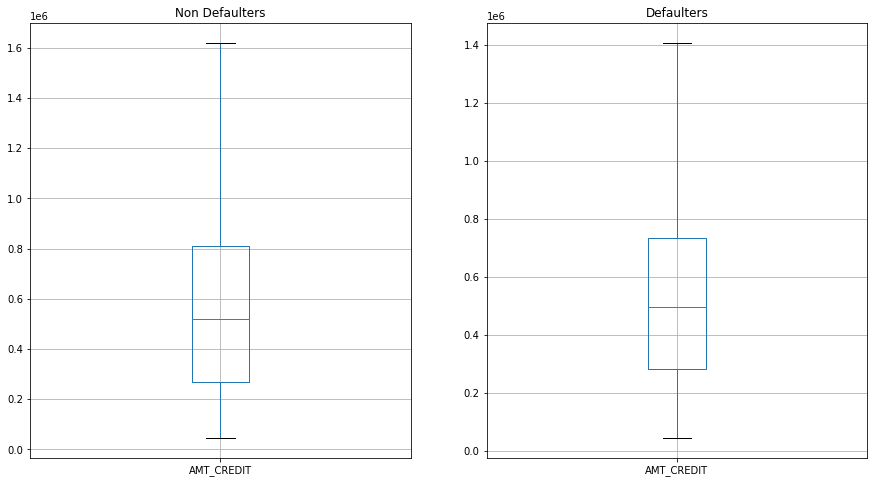

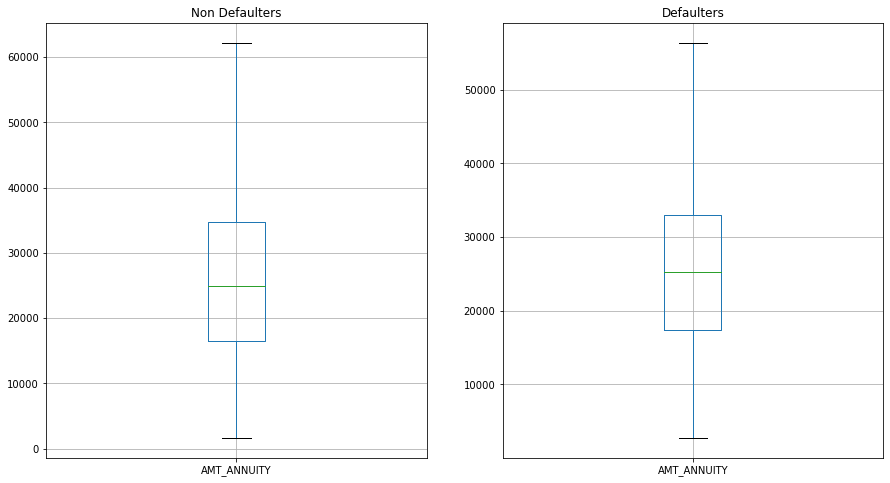

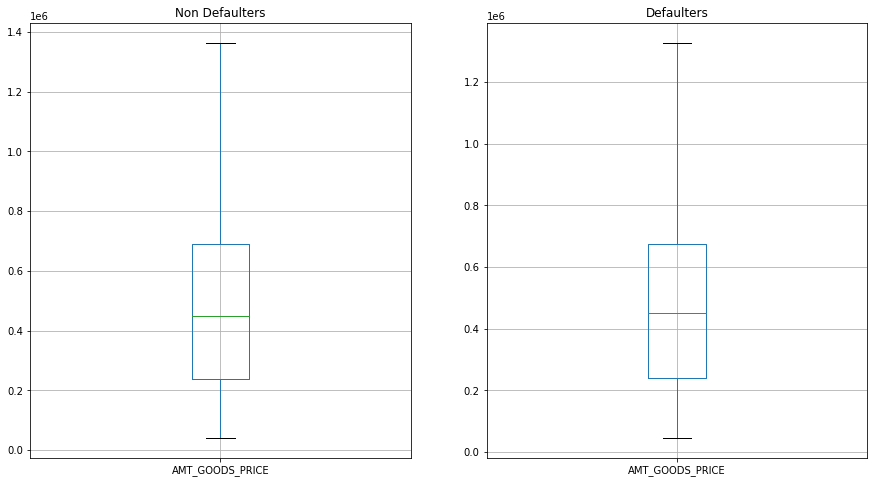

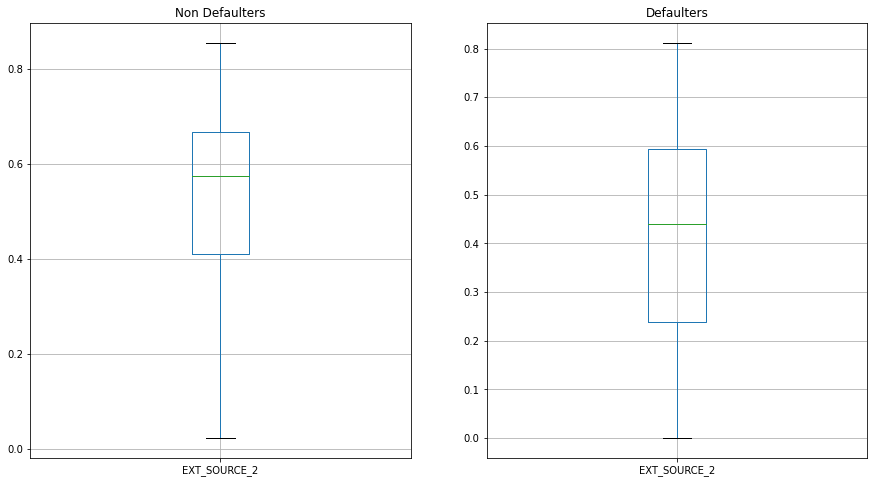

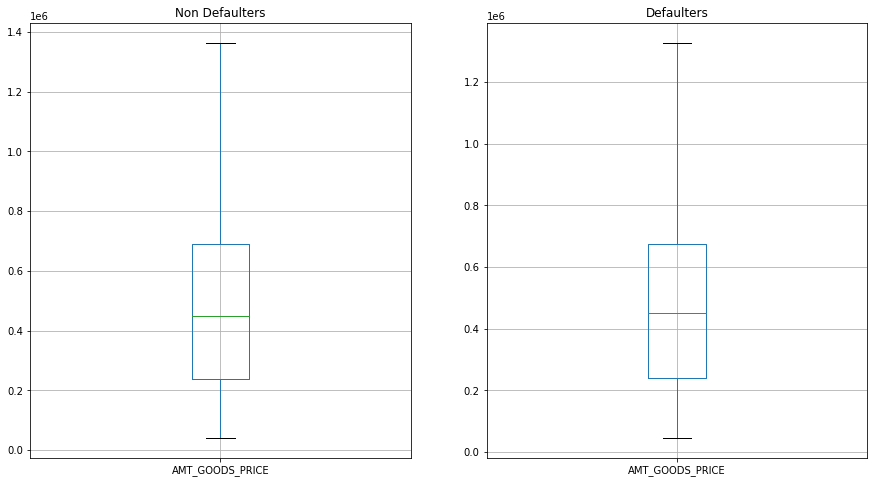

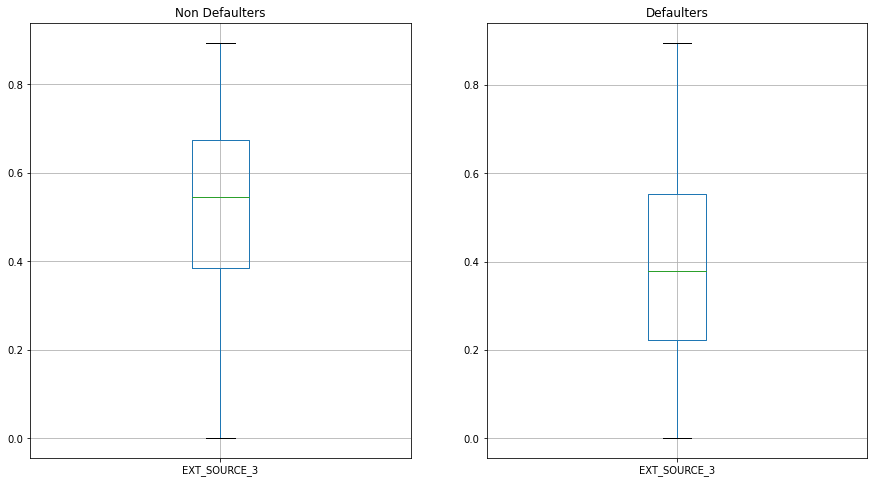

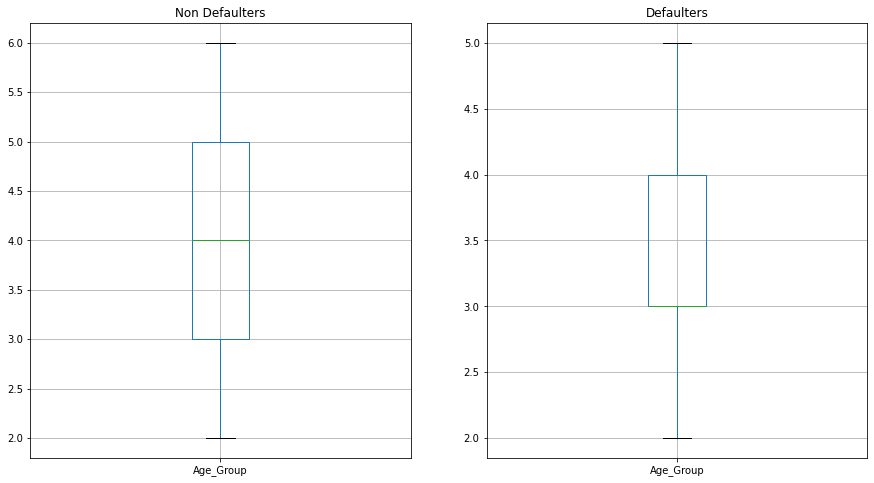

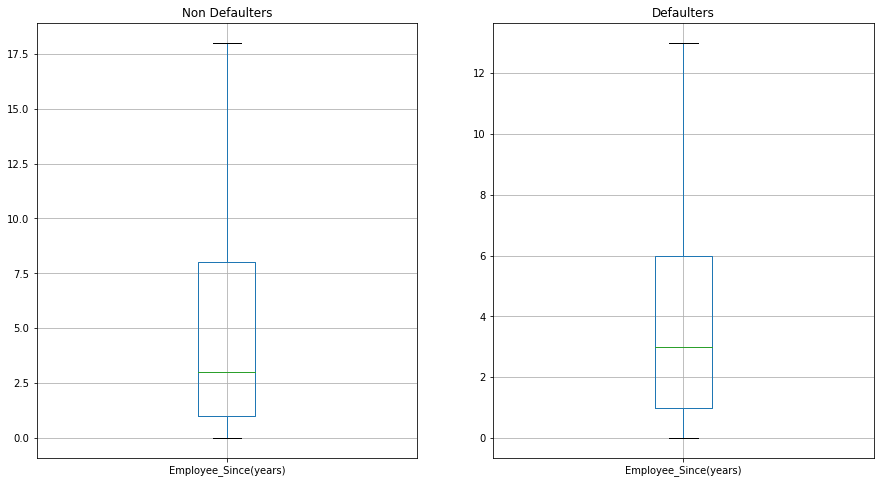

In [30]:
#creating a list of columns where we need to check for outliers
col = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','EXT_SOURCE_2',
       'AMT_GOODS_PRICE','EXT_SOURCE_3','Age_Group','Employee_Since(years)']
for i in col:
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    non_defaulters.boxplot(column=i,showfliers=False)
    plt.title('Non Defaulters')
    plt.subplot(1,2,2)
    defaulters.boxplot(column=i,showfliers=False)
    plt.title('Defaulters')

In [31]:
defaulters.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT

#### Univariate Analysis of Categorical Variables

Text(0.5, 1.0, 'Age_Group for non defaulters')

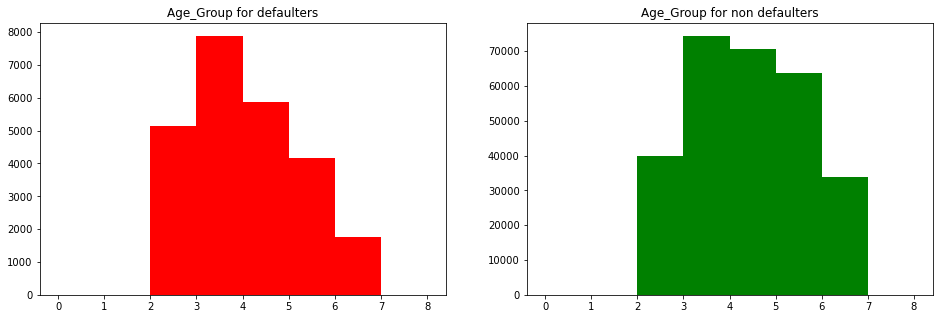

In [32]:

plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
plt.hist(defaulters['Age_Group'],bins=[0,1,2,3,4,5,6,7,8],color='Red')
plt.title('Age_Group for defaulters')

plt.subplot(1,2,2)
plt.hist(non_defaulters['Age_Group'],bins=[0,1,2,3,4,5,6,7,8],color='Green')
plt.title('Age_Group for non defaulters')


###### Most defaults and non-defaulters lies under same age group 30 to 40,slightly defaulters are more in that age group.Generally people above 20years will be eligible for loans(not exactly from the graph)

Text(0.5, 1.0, 'Employee_Since for non-defaulters')

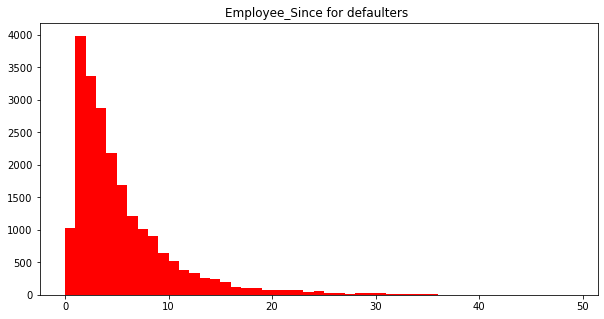

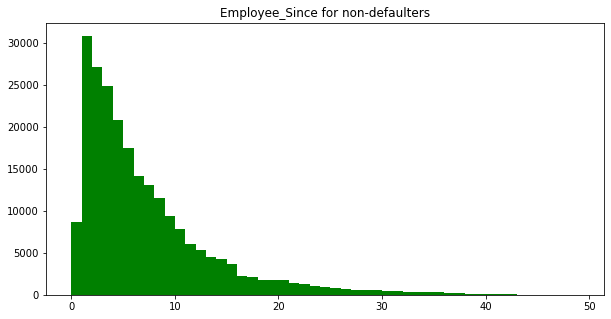

In [33]:
#Plotting histogram for Employee_Since(years) column
plt.figure(figsize = (10,5))
plt.hist(defaulters['Employee_Since(years)'],bins=list(range(0,50)),color='Red')
plt.title('Employee_Since for defaulters ')

plt.figure(figsize = (10,5))
plt.hist(non_defaulters['Employee_Since(years)'],bins=list(range(0,50)),color='Green')
plt.title('Employee_Since for non-defaulters')

###### Employee_since is derived from column describing 'How many days before the application the person started current employment'
From above we can clearly understand that with less days in the current employment,more people belonging to defaulters group rather than non defaults. More days means more years and more experienced,may have good salary too to up the requirments

### Segmented Univariate Analysis

Text(0.5, 1.0, 'For Non-defaulters')

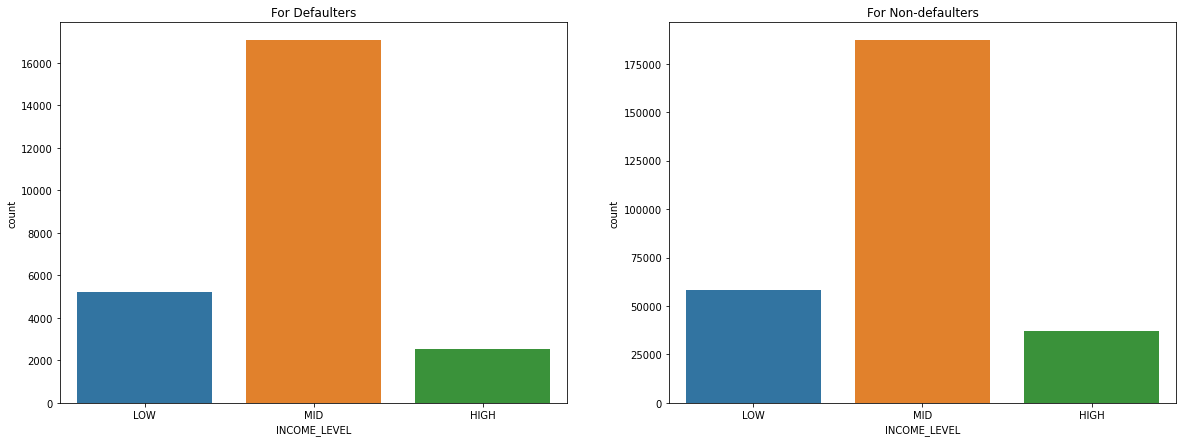

In [34]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(x = 'INCOME_LEVEL', data = defaulters)
plt.title('For Defaulters')
plt.subplot(1,2,2)
sns.countplot(x = 'INCOME_LEVEL', data = non_defaulters)
plt.title('For Non-defaulters')

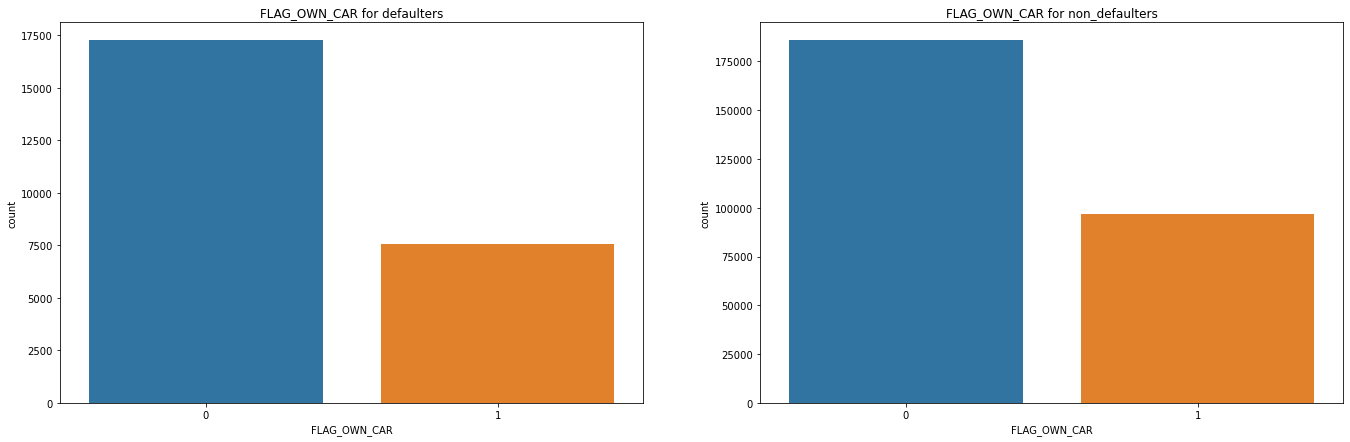

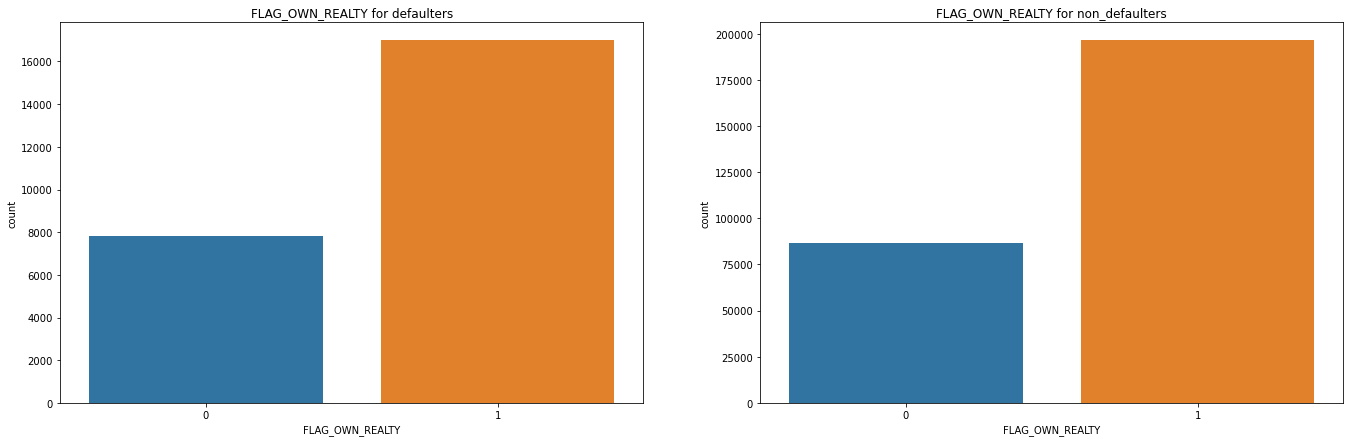

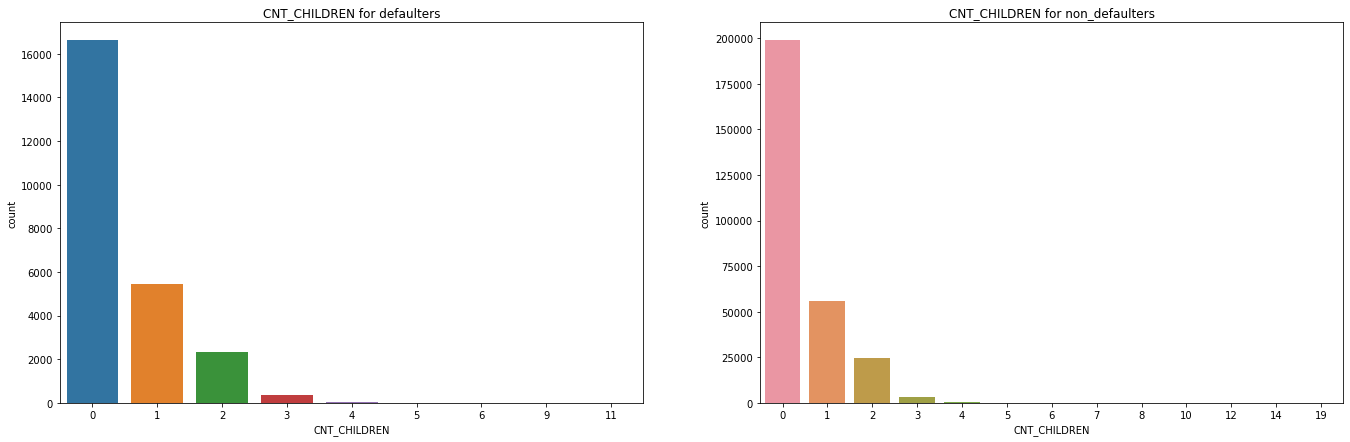

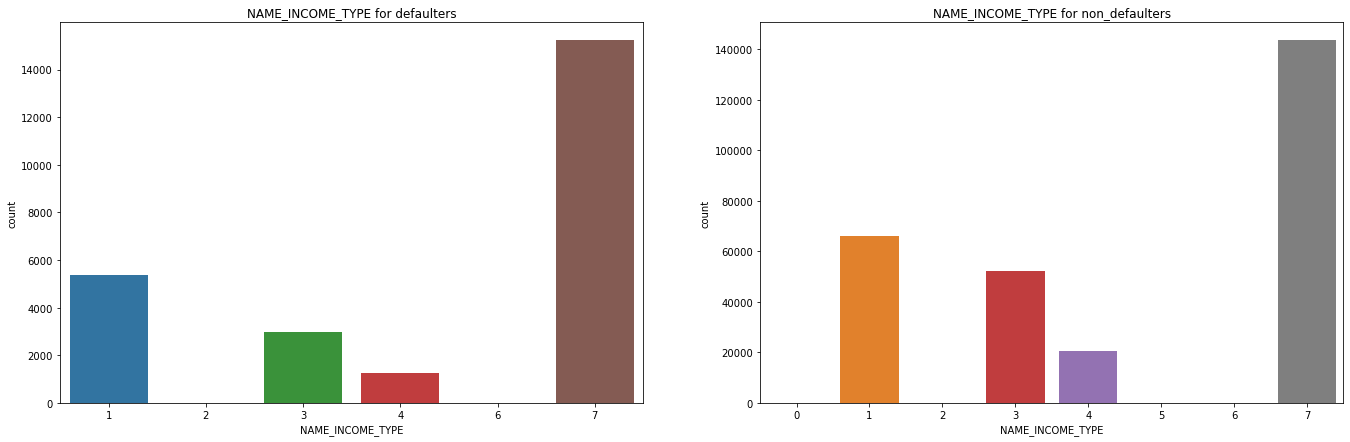

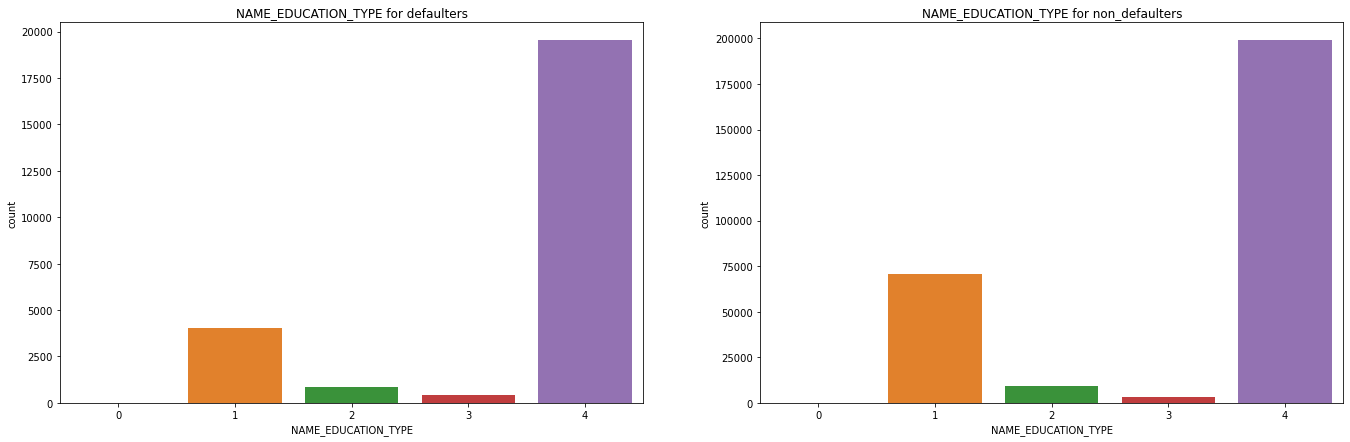

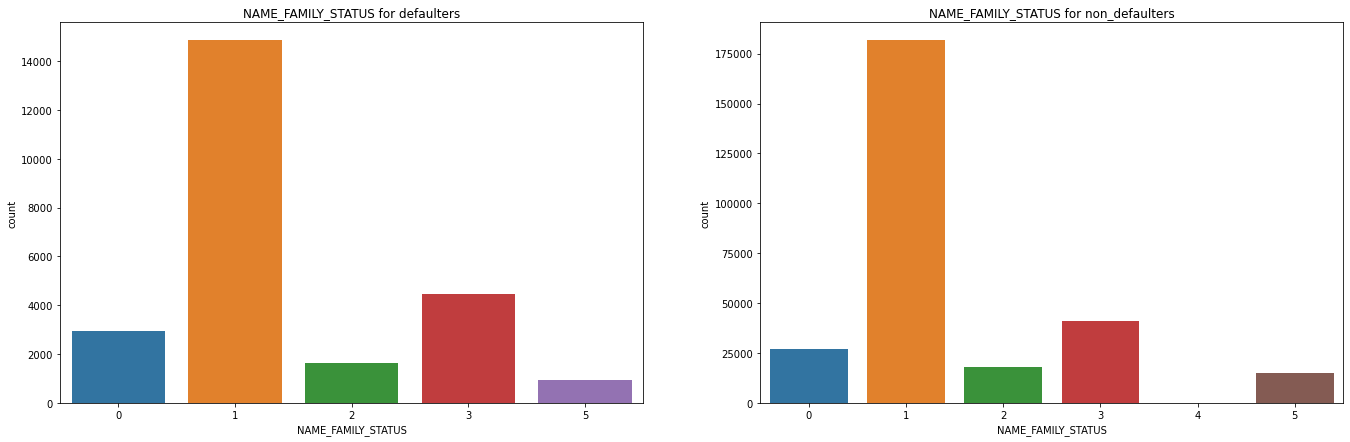

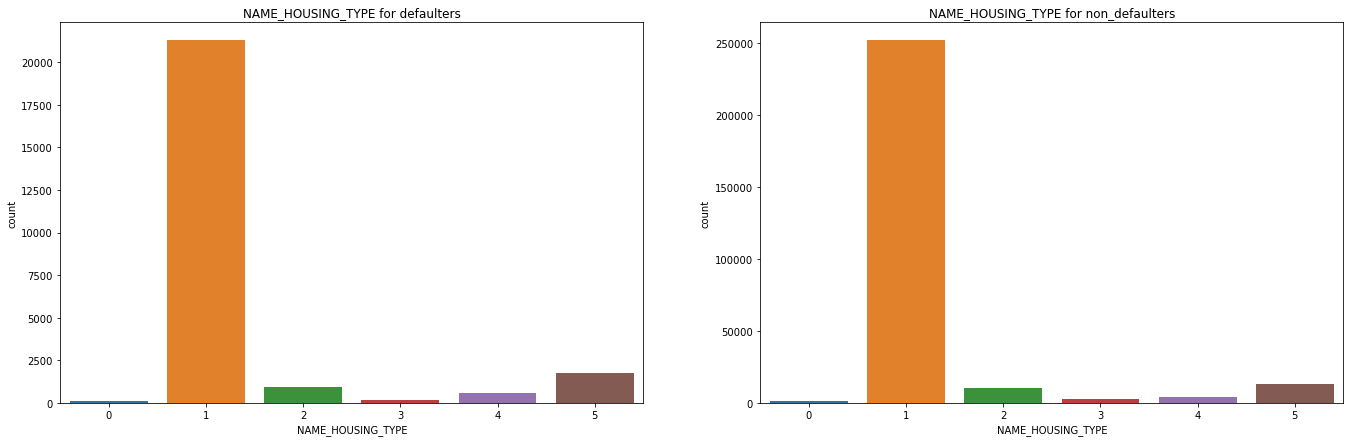

In [35]:
col = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE']
for i in col:
    plt.figure(figsize=(23,7))
    plt.subplot(1,2,1)
    sns.countplot(x=i,data=defaulters)
    plt.title(i+' for defaulters')
    plt.subplot(1,2,2)
    sns.countplot(x=i,data=non_defaulters)
    plt.title(i+' for non_defaulters')

### Bivariate Analysis
Plotting a heat map with correlation values across various numerical variables

Text(0.5, 1.0, 'Correlation Matrix for Non Defaulters')

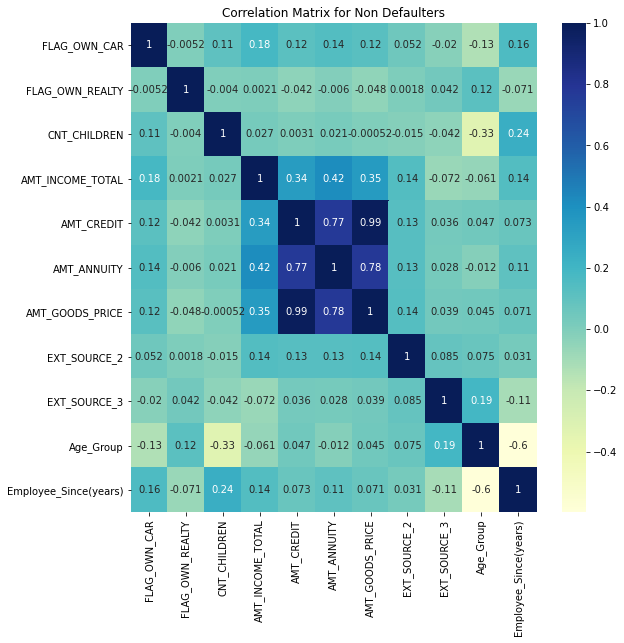

In [36]:
#Creating the correlation matrix using the corr() method.
corr_non_def= non_defaulters[['FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
            'AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3','Age_Group','Employee_Since(years)']].corr()
plt.figure(figsize=(20, 9))
plt.subplot(1,2,1)
sns.heatmap(corr_non_def,cmap='YlGnBu',annot=True)
plt.title('Correlation Matrix for Non Defaulters')

Text(0.5, 1.0, 'Correlation Matrix for Non Defaulters')

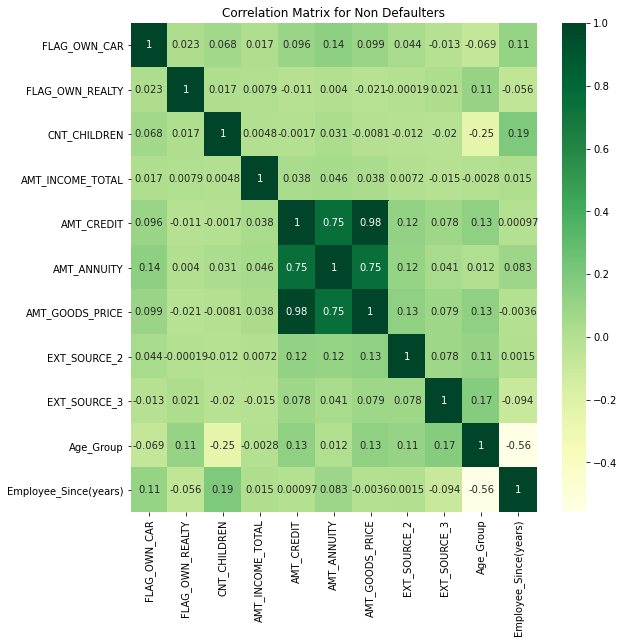

In [37]:
corr_def= defaulters[['FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
            'AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3','Age_Group','Employee_Since(years)']].corr()
plt.figure(figsize=(20, 9))
plt.subplot(1,2,1)
sns.heatmap(corr_def,cmap='YlGn',annot=True)
plt.title('Correlation Matrix for Non Defaulters')

### Scatter Plots 

#### AMT_GOODS_PRICE and AMT_CREDIT

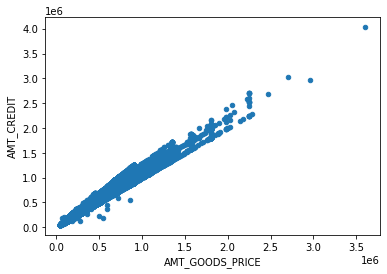

In [38]:
defaulters.plot.scatter(x='AMT_GOODS_PRICE',y='AMT_CREDIT')
plt.show()

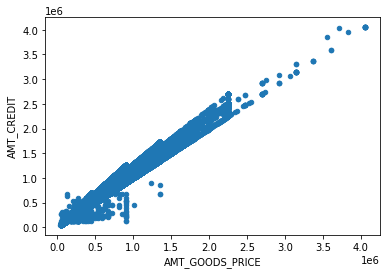

In [39]:
non_defaulters.plot.scatter(x='AMT_GOODS_PRICE',y='AMT_CREDIT')
plt.show()

###### We can clearly see that there is a good positive correlation with AMT_CREDIT & AMT_GOODS_PRICE for both defaulters and non defaulters group

#### AMT_GOODS_PRICE and AMT_ANNUITY

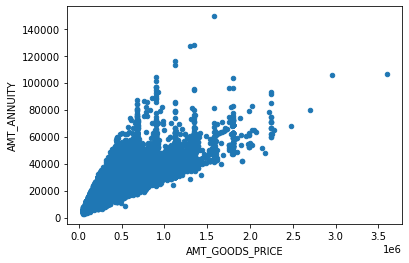

In [40]:
defaulters.plot.scatter(x='AMT_GOODS_PRICE',y='AMT_ANNUITY')
plt.show()

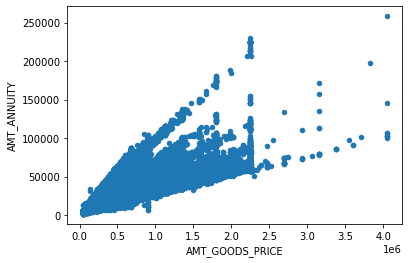

In [41]:
non_defaulters.plot.scatter(x='AMT_GOODS_PRICE',y='AMT_ANNUITY')
plt.show()

###### We can see here that there is a positive correlation with AMT_annuity & AMT_GOODS_PRICE for both defaulters and non defaulters group

#### AMT_CREDIT and AMT_ANNUITY 

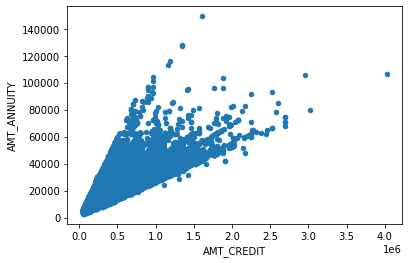

In [42]:
defaulters.plot.scatter(x='AMT_CREDIT',y='AMT_ANNUITY')
plt.show()

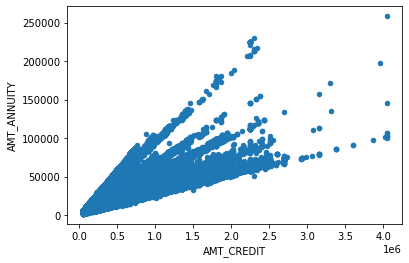

In [43]:
non_defaulters.plot.scatter(x='AMT_CREDIT',y='AMT_ANNUITY')
plt.show()

###### We can see here that there is a positive correlation with AMT_annuity & AMT_CREDIT for both defaulters and non defaulters group

#### AMT_ANNUITY and AMT_INCOME_TOTAL

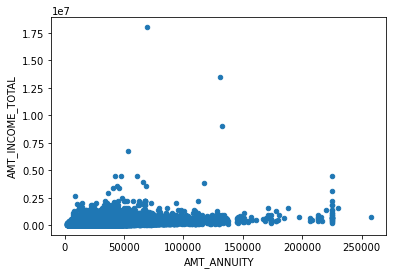

In [44]:
non_defaulters.plot.scatter(x='AMT_ANNUITY',y='AMT_INCOME_TOTAL')
plt.show()

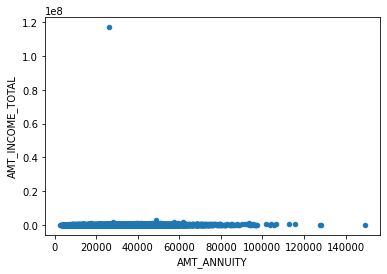

In [45]:
defaulters.plot.scatter(x='AMT_ANNUITY',y='AMT_INCOME_TOTAL')
plt.show()

###### For non_defaulters ,We can see more correlation in AMT_ANNUITY & AMT_INCOME_TOTAL

#### AMT_GOODS_PRICE and AMT_INCOME_TOTAL

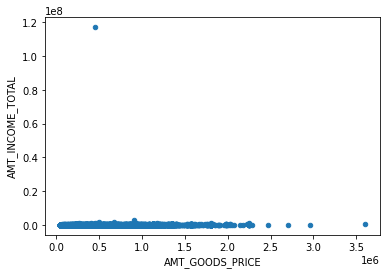

In [46]:
defaulters.plot.scatter(x='AMT_GOODS_PRICE',y='AMT_INCOME_TOTAL')
plt.show()

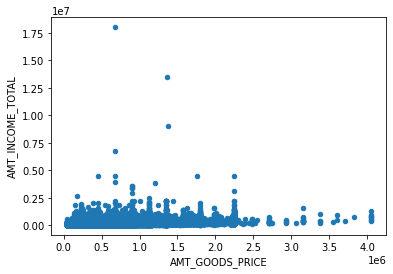

In [47]:
non_defaulters.plot.scatter(x='AMT_GOODS_PRICE',y='AMT_INCOME_TOTAL')
plt.show()

# Previous application data

In [125]:
prev_data = pd.read_csv("previous_application.csv")

In [126]:
prev_data.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


In [127]:
#prev_data.set_index('SK_ID_PREV',inplace=True)

In [128]:
#prev_data.set_index('SK_ID_CURR',inplace=True)

In [129]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [130]:
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


There are many columns with value 365243. It is being used instead of null values. Therefore, lets replace 365243 with null values.

In [131]:
#Replacing 365243, XNA and XAP values with null values.
prev_data.replace({365243:np.NaN, 'XNA':np.NaN,'XAP':np.NaN}, inplace=True)

Let's check the percentage null values

In [132]:
#Column-wise percent null values
round(100*prev_data.isnull().sum()/prev_data.shape[0])

SK_ID_PREV                       0.0
SK_ID_CURR                       0.0
NAME_CONTRACT_TYPE               0.0
AMT_ANNUITY                     22.0
AMT_APPLICATION                  0.0
AMT_CREDIT                       0.0
AMT_DOWN_PAYMENT                54.0
AMT_GOODS_PRICE                 23.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
RATE_DOWN_PAYMENT               54.0
RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
NAME_CASH_LOAN_PURPOSE          96.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
NAME_PAYMENT_TYPE               38.0
CODE_REJECT_REASON              81.0
NAME_TYPE_SUITE                 49.0
NAME_CLIENT_TYPE                 0.0
NAME_GOODS_CATEGORY             57.0
NAME_PORTFOLIO                  22.0
NAME_PRODUCT_TYPE               64.0
CHANNEL_TYPE                     0.0
SELLERPLACE_AREA                 0.0
N

Lets remove the columns with more than 40% null values.

In [112]:
prev_data = prev_data.loc[:,(100 * prev_data.isnull().mean())<40]

In [113]:
#Removing columns which are not important
prev_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [114]:
#Creating a list 'col' in which we will add all the non required columns from prev_app
col = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
      'DAYS_DECISION','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','SELLERPLACE_AREA','CNT_PAYMENT','NAME_YIELD_GROUP','PRODUCT_COMBINATION']
#Dropping all the columns whose names were present in 'col'
prev_data = prev_data.drop(columns=col)

###### We need to merge the two DataFrames appl_data and prev_data into one DataFrame, df by using inner join

In [115]:
#Merging app_data and prev_app using inner join
comp_data = pd.merge(appl_data, prev_data, how='inner', on=('SK_ID_CURR','SK_ID_CURR'))

In [116]:
comp_data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,INCOME_LEVEL,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,NAME_PORTFOLIO,CHANNEL_TYPE
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,MID,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,Approved,POS,Stone
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,HIGH,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,Approved,Cash,Credit and cash offices


With complete dataset we can get previous datas of customers

In [117]:
comp_data['NAME_CONTRACT_STATUS'].unique()

array(['Approved', 'Canceled', 'Refused', 'Unused offer'], dtype=object)

###### Performing Univariate Analysis on the newly added variables for defaulters and non defaulters

In [118]:
non_defaulters1= comp_data[comp_data['TARGET'] == 0]
defaulters1 = comp_data[comp_data['TARGET'] == 1]

Text(0.5, 1.0, 'For defaulters')

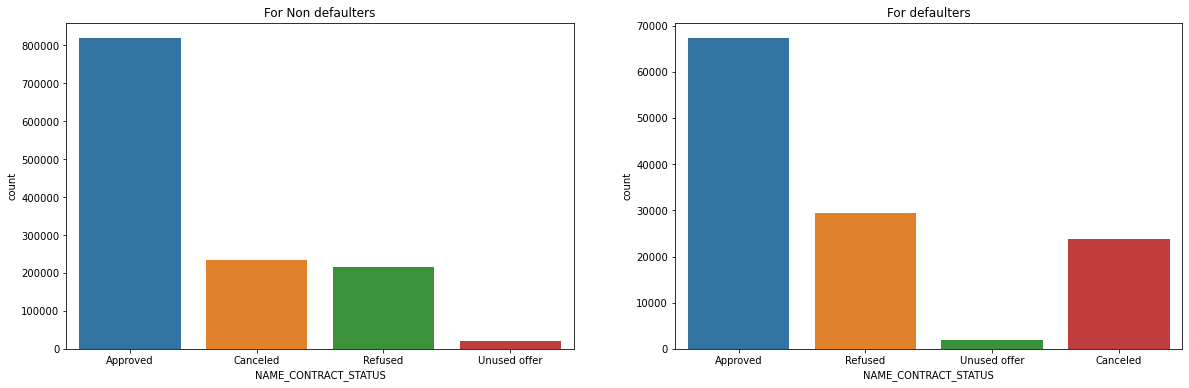

In [119]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x='NAME_CONTRACT_STATUS',data=non_defaulters1)
plt.title('For Non defaulters')
plt.subplot(1,2,2)
sns.countplot(x='NAME_CONTRACT_STATUS',data=defaulters1)
plt.title('For defaulters')

Text(0.5, 1.0, 'For Target=1')

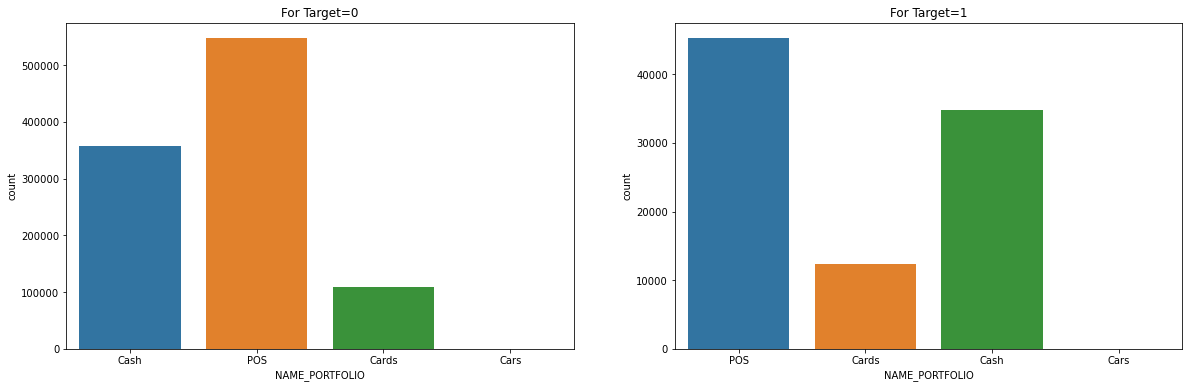

In [120]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x='NAME_PORTFOLIO', data=non_defaulters1)
plt.title('For Target=0')
plt.subplot(1,2,2)
sns.countplot(x='NAME_PORTFOLIO',data=defaulters1)
plt.title('For Target=1')

Text(0.5, 1.0, 'For Target=1')

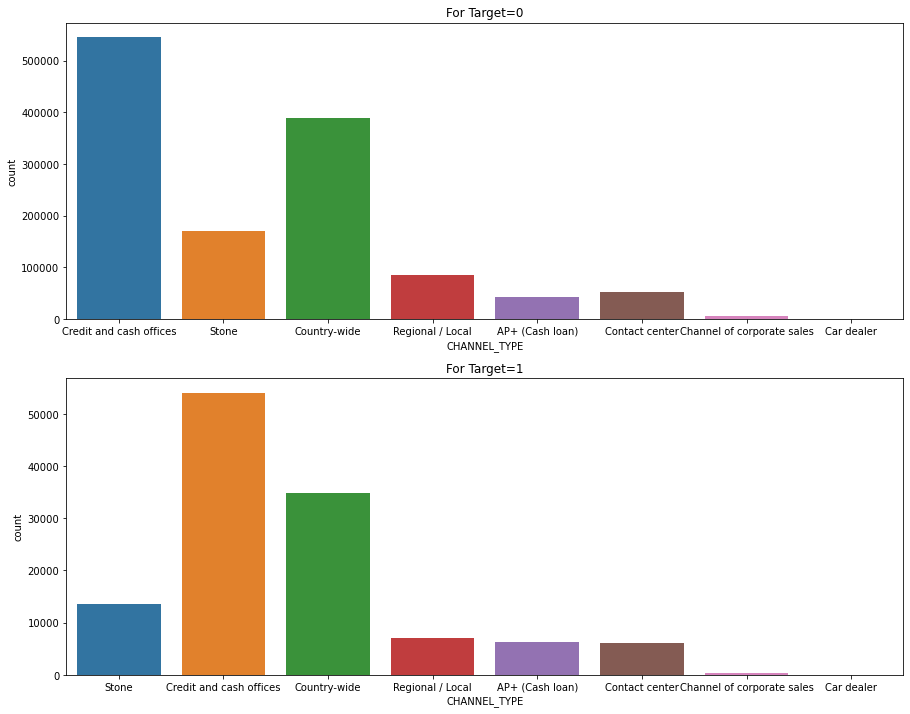

In [121]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
sns.countplot(x='CHANNEL_TYPE', data=non_defaulters1)
plt.title('For Target=0')
plt.subplot(2,1,2)
sns.countplot(x='CHANNEL_TYPE',data=defaulters1)
plt.title('For Target=1')

Now look into some categorical variables only for the defaulters (Target=1). This is because we will have to see what facotrs led previous approved loan applicants to default on their payments.

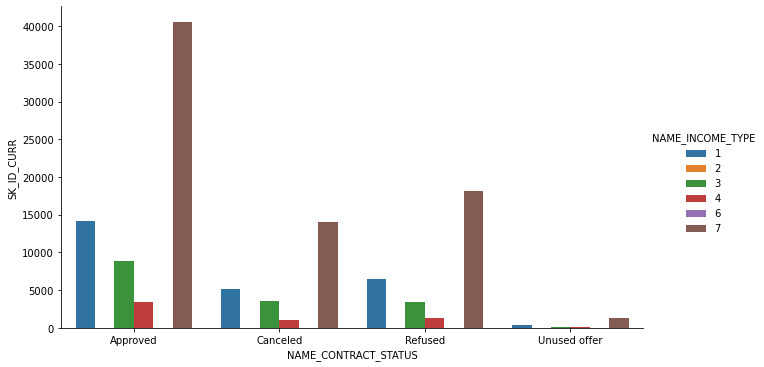

In [122]:
#Creating a pivot table so that we can plot a bar plot for 'NAME_CONTRACT_STATUS','TARGET','NAME_INCOME_TYPE' only for defaulting (Target=1) clients
piv = comp_data[comp_data['TARGET']==1].pivot_table(index=['NAME_CONTRACT_STATUS','TARGET','NAME_INCOME_TYPE'],values='SK_ID_CURR',aggfunc='count').reset_index()
#Using catplot to plot the bar plot with hue
sns.catplot(x='NAME_CONTRACT_STATUS',y='SK_ID_CURR', hue='NAME_INCOME_TYPE',data=piv,kind='bar',aspect=1.8)

In [ ]:
#BROWN-7 

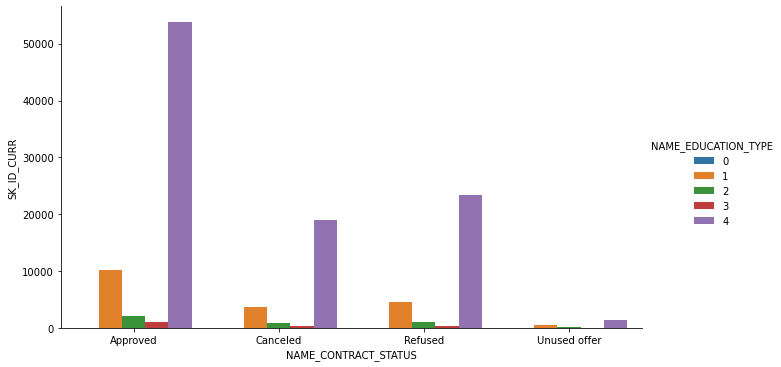

In [134]:
#Creating a pivot table so that we can plot a bar plot for 'NAME_CONTRACT_STATUS','TARGET','NAME_EDUCATION_TYPE'
piv = comp_data[comp_data['TARGET']==1].pivot_table(index=['NAME_CONTRACT_STATUS','TARGET','NAME_EDUCATION_TYPE'],values='SK_ID_CURR',aggfunc='count').reset_index()
#Using catplot to plot the bar plot with hue
sns.catplot(x='NAME_CONTRACT_STATUS', hue='NAME_EDUCATION_TYPE', y='SK_ID_CURR',data=piv,kind='bar',aspect=1.8)

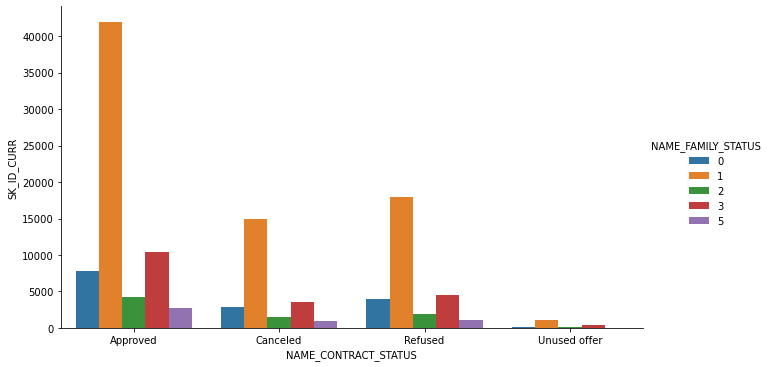

In [136]:
#Creating a pivot table so that we can plot a bar plot for 'NAME_CONTRACT_STATUS','TARGET','NAME_FAMILY_STATUS'
piv = comp_data[comp_data['TARGET']==1].pivot_table(index=['NAME_CONTRACT_STATUS','TARGET','NAME_FAMILY_STATUS'],values='SK_ID_CURR',aggfunc='count').reset_index()
#Using catplot to plot the bar plot with hue
sns.catplot(x='NAME_CONTRACT_STATUS', hue='NAME_FAMILY_STATUS', y='SK_ID_CURR',data=piv,kind='bar',aspect=1.8)

###### From the above plots, people whose loans were approved in the past but are defaulters now are most influenced by these characteristics

People who are Working or Commercial_Associate
People who  has Secondary_Education
People who are Married


# CONCLUSION